# Group-12 Car Price Prediction
* **M.VISHAL REDDY**
* **S.MANIKANTA KUMAR**
### (2nd dataset)

**In this Project, I'm are going to predict the Price of Used Cars using various features like Brand, Price, Mileage, Fuel_Type, Year etc. The data used in this project was downloaded from Kaggle.**

## Importing Libraries for model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Loading Data

### 1. Data Summarization

In [2]:
data=pd.read_csv('data2.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


* **Succesfully loaded data and need to know about the data now.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### 2. Data Pre-Processing

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

* **Since there are null values 1st need to fill those with mean values**

#### * Drop features that are not required to build our model *

In [6]:
data.drop(['Model'],axis=1,inplace=True)

# In Model column There are three hundred and twelve unique models. 
# That's something really hard to implement and a regression that would mean more than 300 dummies.
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


### 3. Data Visualization and Cleaning

C:\Users\91938\AppData\Local\Temp\ipykernel_17036\733217122.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

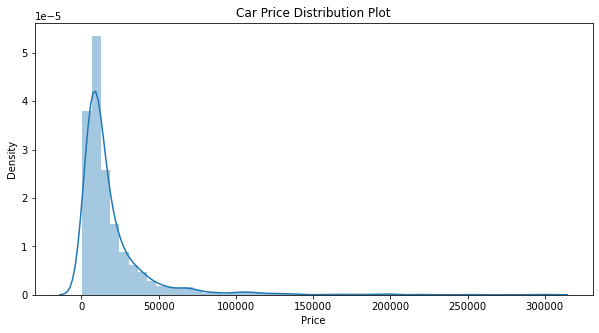

In [7]:
plt.figure(figsize=[10,5])
sb.distplot(data['Price'])
plt.title('Car Price Distribution Plot')

C:\Users\91938\AppData\Local\Temp\ipykernel_17036\1898929746.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Year'])
C:\Users\91938\AppData\Local\Temp\ipykernel_17036\1898929746.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Mileage'])


Text(0.5, 1.0, 'EngineV Distribution Plot')

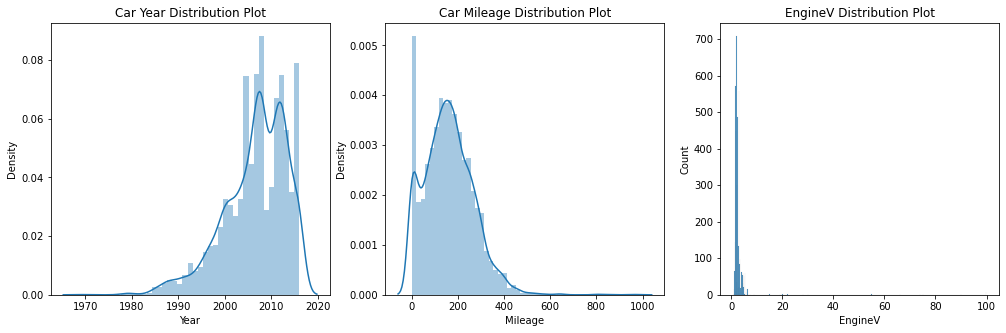

In [8]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sb.distplot(data['Year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sb.distplot(data['Mileage'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sb.histplot(data['EngineV'])
plt.title('EngineV Distribution Plot')

### * Here it is clearly visible that there are some outliers in Price, year, Mileage and EngineV numerical veriables.

### Dealing with outliers

In [9]:
# Here, the outliers are situated around the higher prices (right side of the graph)
# we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price
# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data['Price'].quantile(0.99)

# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data[data['Price']<q]

C:\Users\91938\AppData\Local\Temp\ipykernel_17036\14630992.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_1['Price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

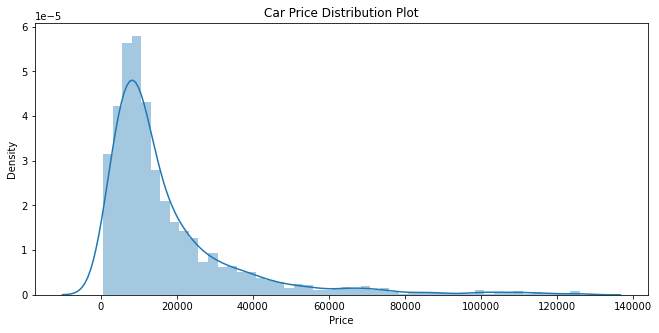

In [10]:
#check the PDF once again
plt.figure(figsize=[11,5])
sb.distplot(data_1['Price'])
plt.title('Car Price Distribution Plot')

* However, there are much fewer outliers
* Mileage Column

C:\Users\91938\AppData\Local\Temp\ipykernel_17036\1327988849.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Mileage'])


Text(0.5, 1.0, 'Car Mileage Distribution Plot')

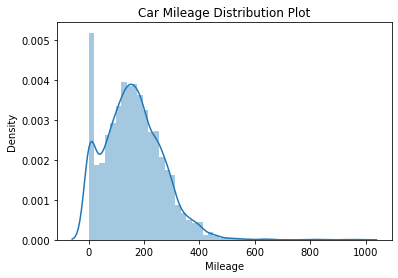

In [11]:
#Now we can treat the other numerical variables outlier in a similar way
sb.distplot(data['Mileage'])
plt.title('Car Mileage Distribution Plot')

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\91938\AppData\Local\Temp\ipykernel_17036\2889173108.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_2['Mileage'])


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

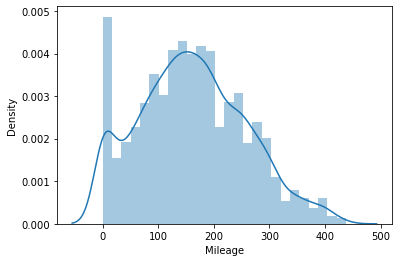

In [13]:
# Hurray this plot looks kind of normal
sb.distplot(data_2['Mileage'])

* Year Column

C:\Users\91938\AppData\Local\Temp\ipykernel_17036\1599307329.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Year'])


<AxesSubplot:xlabel='Year', ylabel='Density'>

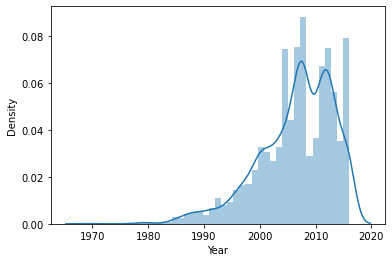

In [14]:
# In this scenario outliers are on the low end
sb.distplot(data['Year'])

In [15]:
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

C:\Users\91938\AppData\Local\Temp\ipykernel_17036\2627701445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_3['Year'])


<AxesSubplot:xlabel='Year', ylabel='Density'>

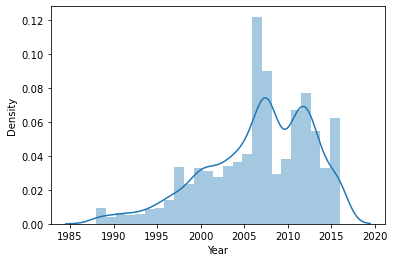

In [16]:
sb.distplot(data_3['Year'])

* EngineV Column

C:\Users\91938\AppData\Local\Temp\ipykernel_17036\2792067555.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['EngineV'])


Text(0.5, 1.0, 'EngineV Distribution Plot')

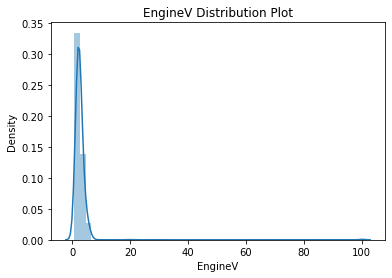

In [17]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sb.distplot(data['EngineV'])
plt.title('EngineV Distribution Plot')

In [18]:
# Car engine volumes are usually (always?) below 6.5l, You can google it
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_4 = data_3[data_3['EngineV']<6.5]

C:\Users\91938\AppData\Local\Temp\ipykernel_17036\192832906.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_4['EngineV'])


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

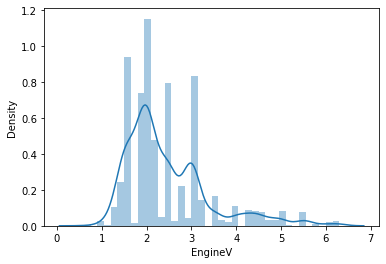

In [19]:
# now its looks kind of normal
sb.distplot(data_4['EngineV'])

**Since we deleted some rows inedx values are shuffeled. So I need to reset those now**

In [20]:
# Reset index
cleaned_data = data_4.reset_index(drop=True)
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [21]:
cleaned_data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

**Now cleared with null values**

## lets check the linearity using a scatter plot

Text(0.5, 1.0, 'Price and EngineV')

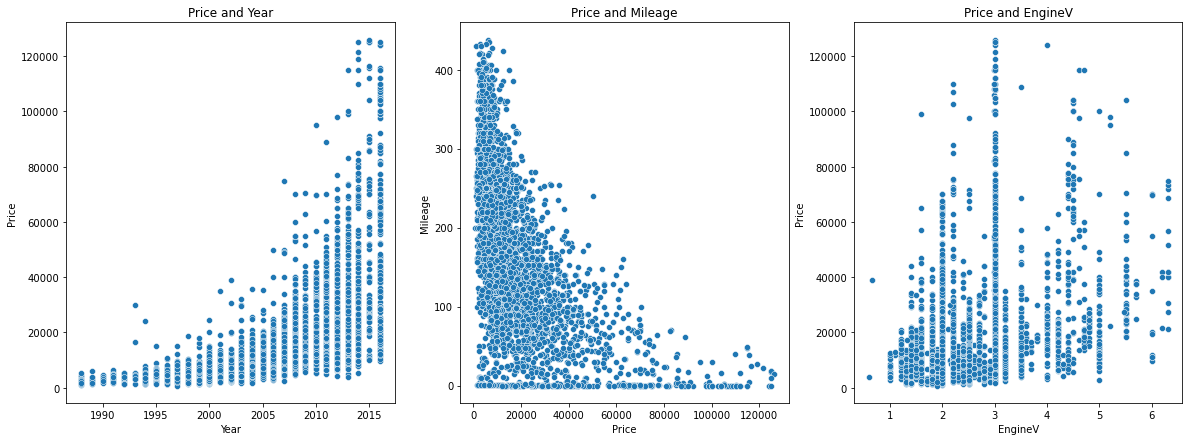

In [22]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sb.scatterplot(x='Year',y='Price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sb.scatterplot(x='Price',y='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sb .scatterplot(y='Price',x='EngineV',data=cleaned_data)
plt.title("Price and EngineV")

we can spot patterns but definitely not perfect linear once. we know we should not run a linear regression in this case. we should first transform one or more variables recall the ditribution plot of price to all these plot are pointing us towards the idea that **price is not normally distributed.**

And from there its relationships with the other rather normally distributed features is not linear.

C:\Users\91938\AppData\Local\Temp\ipykernel_17036\2476735254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(cleaned_data['Price'])


<AxesSubplot:xlabel='Price', ylabel='Density'>

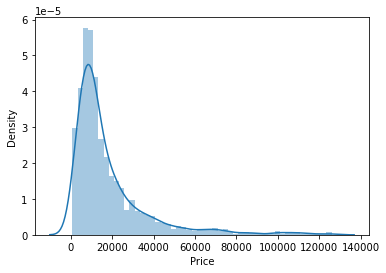

In [23]:
#recall the distribution plot of price
sb.distplot(cleaned_data['Price'])

See The patterns are quite exponentials in this condition **log transformation is a common way to deal with this issue.** log transformation is especially useful when facing exponential scatter plots like we do now.

## Let's transform 'Price' with a log transformation

In [24]:
# Let's transform 'Price' with a log transformation
log_price = np.log(cleaned_data['Price'])

# Then we add it to our data frame
cleaned_data['log_price'] = log_price
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


Text(0.5, 1.0, 'Log price and EngineV')

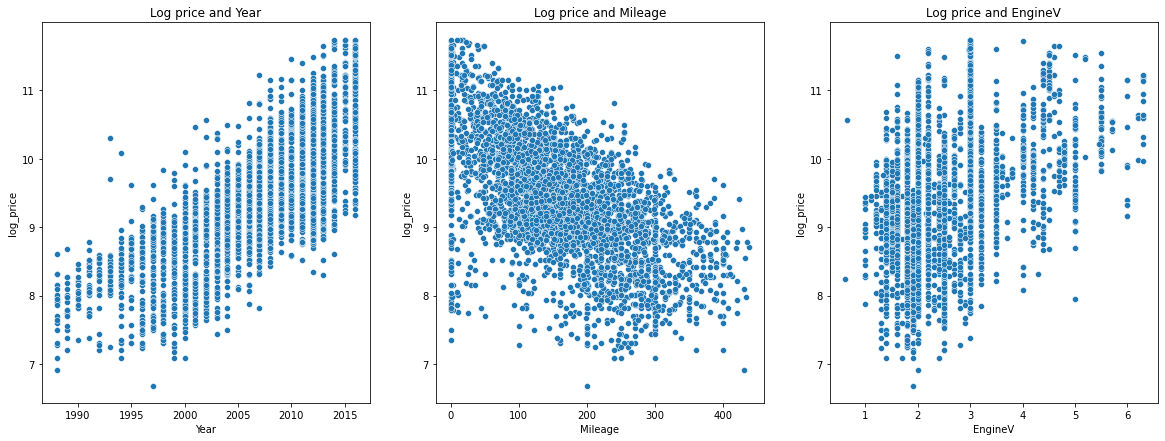

In [25]:
# Let's check the three scatters once again

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year")
sb.scatterplot(x='Year',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Log price and Mileage")
sb.scatterplot(y='log_price',x='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sb.scatterplot(y='log_price',x='EngineV',data=cleaned_data)
plt.title("Log price and EngineV")

# The relationships show a clear linear relationship
# This is some good linear regression material

In [26]:
# Since we will be using the log price variable, we can drop the old 'Price' one
cleaned_data = cleaned_data.drop(['Price'],axis=1)


## Checking Multicollinearity Using VIF

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791488,Mileage
1,10.355619,Year
2,7.669947,EngineV


In [28]:
# 'Year' has high VIF so we are just droping that column
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicolinearity = cleaned_data.drop('Year',axis=1)

In [29]:
data_no_multicolinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


# Feature Selection

Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

In [30]:
from sklearn.preprocessing import LabelEncoder
temp_data = data_no_multicolinearity.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Mileage         0.614326
Registration    0.463090
EngineV         0.410888
Body            0.387858
Brand           0.098734
Engine Type     0.014069
dtype: float64


<AxesSubplot:>

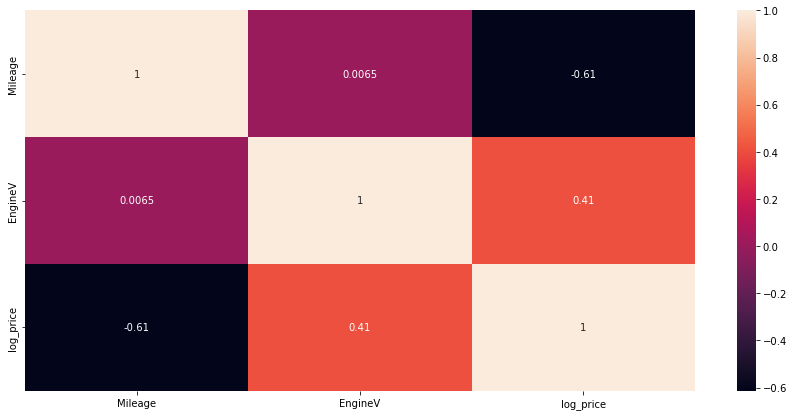

In [31]:
# correlation heat map
plt.figure(figsize=[15,7])
sb.heatmap(data_no_multicolinearity.corr(), annot=True)

**Feature Importance**

*Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.*

In [32]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

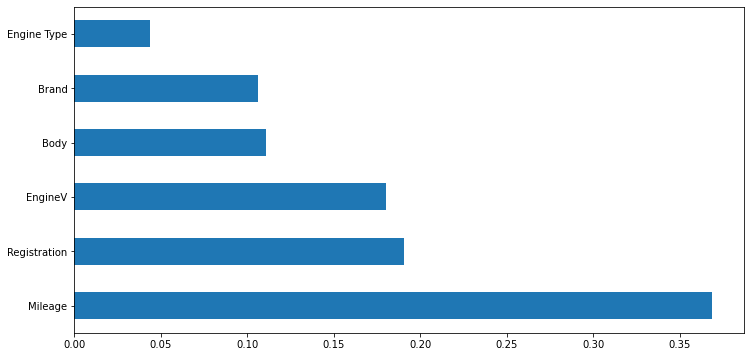

In [33]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [34]:
print(feat_importances.sort_values(ascending=False))

Mileage         0.368611
Registration    0.190769
EngineV         0.180273
Body            0.110857
Brand           0.105815
Engine Type     0.043675
dtype: float64


## Categorical Features

In [35]:
#Creating Dummie Variables
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [36]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Model Development


### Declaring dependent and independent variable

In [37]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

### Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['Mileage','EngineV']])

StandardScaler()

In [39]:
# It is not usually recommended to standardize dummy variables
#For ML purposes we rarely put too much thought into it and go with the scale dummies as 
#scaling has no effect on their predictive power.
inputs_scaled = scaler.transform(x[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage','EngineV'])

In [40]:
input_scaled2 =scaled_data.join(x.drop(['Mileage','EngineV'],axis=1))

In [41]:
input_scaled2

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1.215838,-0.474136,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2.783385,0.474845,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2.062313,2.689136,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0.829177,1.845596,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,-0.424860,-0.474136,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,0.024503,0.053076,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,-1.313137,-0.895906,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,-1.584845,0.580288,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,-1.668447,1.107500,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Training and Testing Data

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

# Linear Regression Model

In [43]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.7577917440305519
RMSE : 0.43433089606000425


# Random Forest Regressor Model

In [44]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.7908698791842658
RMSE : 0.40358456356351763


# GBT Regressor Model

In [45]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.7861656921459551
RMSE : 0.40809845000298617


In [46]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbt)))

MAE: 0.298018182317896
MSE: 0.1665443448948398
RMSE: 0.40809845000298617


# Select The Best Model

*So as we try diferent Regression Alorithms and found that **"GBT Regressor Model"** is giving better accuracy compare to other.*

# let's manually check these predictions

In [47]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
769,5998.42,2999.00,-2999.42,100.01
770,9456.65,9600.00,143.35,1.49
771,15018.51,18300.00,3281.49,17.93
772,50605.57,62000.00,11394.43,18.38
773,12162.12,10000.00,-2162.12,21.62
